# Prediksi Perokok atau tidak

In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


## melihat 5 data teratas

In [91]:
dfAsuransi = pd.read_csv('/kaggle/input/insurance/insurance.csv')
dfAsuransi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Menampilkan data umur dengan menggunakan diagram batang

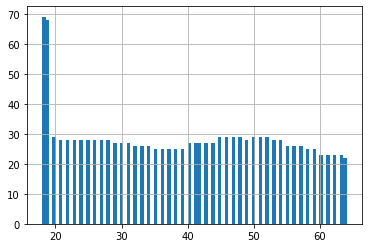

In [113]:
dfAsuransi['age'].hist(bins=90)

## Menampilkan data jenis kelamin beserta anaknya

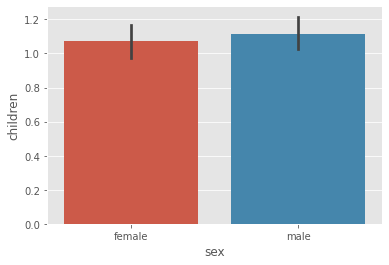

In [114]:
plt.style.use('ggplot')
sns.barplot(x='sex', y='children', data=dfAsuransi)

## Copy kolom tertentu dan masukkan kedalam data baru

In [92]:

dataAsuransi = dfAsuransi[['age','sex','bmi','children','smoker']].copy()
dataAsuransi.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


## Melihat kolom dan tipe beserta jumlah datanya

In [93]:
dataAsuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 52.4+ KB


## Melakukan Persiapan Data

In [94]:
def preprocessing(df):
    df['sex'] = df['sex'].map({'male':0, 'female':1})
    df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
    return dataAsuransi
dataFinal = preprocessing(dataAsuransi)
dataFinal

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


## Menggunakan prediksi train split

In [95]:
y = dataFinal.smoker
x = dataFinal.drop('smoker',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

# X_train = dataFinal.drop("smoker", axis=1).fillna(0.0)
# Y_train = dataFinal["smoker"]
# X_test  = dataFinal.copy()
# X_train.shape, Y_train.shape, X_test.shape

,age,sex,bmi,children
374,20,0,33.330,0
1038,22,0,28.880,0
168,19,1,31.825,1
752,64,0,37.905,0
834,36,0,33.820,1


## Analisis Menggunakan Linear Regression

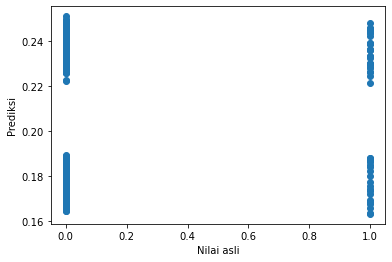

In [96]:
model = LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Nilai asli')
plt.ylabel('Prediksi')
plt.show()

## Import SKlearn

In [97]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

## Analisis Menggunakan logistic regression

In [98]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

79.35

## Analisis Menggunakan SVC

In [99]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

79.35

## Analisis Menggunakan KNNeighborsClassifier

In [100]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

83.93

## Analisis Menggunakan GaussianNB

In [101]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

79.35

## Analisis Menggunakan LinearSVC

In [102]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.35

## Analisis Menggunakan Perceptron

In [103]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

79.35

## Analisis Menggunakan DecisionTreeClassifier

In [104]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.81

## Analisis Menggunakan RandomForestClassifier

In [105]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.81

## Analisis Menggunakan SGDClassifier

In [106]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

68.5

## Menampilkan hasil dari semua metode analisis dan mengurutkanya mulai dari yang terbanyak

In [107]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.81
8,Decision Tree,99.81
1,KNN,83.93
0,Support Vector Machines,79.35
2,Logistic Regression,79.35
4,Naive Bayes,79.35
5,Perceptron,79.35
7,Linear SVC,79.35
6,Stochastic Gradient Decent,68.50


In [125]:
Final = pd.DataFrame({
        "Age": x_test["age"],
        "Smokers": Y_pred
    })
Final

,Age,Smokers
968,21,1
530,57,0
341,62,0
1218,46,0
1010,48,0
...,...,...
1026,19,1
930,26,1
923,34,0
306,28,0
